LESSON <br>
https://colab.research.google.com/drive/1Ld2MFsmwmZnzqJ3HkoPLC52qm5ayz0zV

https://github.com/public-apis/public-apis

documentation ? : https://lcosmin.github.io/boardgamegeek/modules.html#module-boardgamegeek.objects.games

In [1]:
import requests

In [2]:
import requests

# Define the base URL for the BGG API
base_url = "https://www.boardgamegeek.com/xmlapi2/"

# Define the endpoint and parameters
endpoint = "thing"
params = {"id": 13}  # Example: retrieving information about the game with ID 13

# Make the HTTP GET request
response = requests.get(base_url + endpoint, params=params)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Parse the XML response
    game_info = response.text
    # Now you can process the game_info XML data
    print(game_info)
else:
    print("Error:", response.status_code)

<?xml version="1.0" encoding="utf-8"?><items termsofuse="https://boardgamegeek.com/xmlapi/termsofuse"><item type="boardgame" id="13">
         <thumbnail>https://cf.geekdo-images.com/W3Bsga_uLP9kO91gZ7H8yw__thumb/img/8a9HeqFydO7Uun_le9bXWPnidcA=/fit-in/200x150/filters:strip_icc()/pic2419375.jpg</thumbnail>
      <image>https://cf.geekdo-images.com/W3Bsga_uLP9kO91gZ7H8yw__original/img/xV7oisd3RQ8R-k18cdWAYthHXsA=/0x0/filters:format(jpeg)/pic2419375.jpg</image>
                                     				
				<name type="primary" sortindex="1" value="CATAN" />
			
						                               				
				<name type="alternate" sortindex="1" value="Catan" />
			    				
				<name type="alternate" sortindex="1" value="Catan (Колонизаторы)" />
			    				
				<name type="alternate" sortindex="1" value="Catan telepesei" />
			    				
				<name type="alternate" sortindex="1" value="Catan: Das Spiel" />
			    				
				<name type="alternate" sortindex="1" value="Catan: Die Bordspel" />
			 

In [ ]:
'''

API - Retrieve data.ipynb"
This example retrieves information about the board game with ID 13 from the BGG API using the /thing endpoint. You can replace 13 with the ID of any board game you're interested in.

Remember to handle errors and edge cases appropriately in your code, and ensure that you comply with the usage policies and rate limits of the BoardGameGeek API.

'''

In [5]:
import requests
import xml.etree.ElementTree as ET

base_url = "https://boardgamegeek.com/xmlapi/boardgame/"

# Function to retrieve information about a board game given its ID
def get_boardgame_info(game_id):
    url = base_url + str(game_id)
    response = requests.get(url)
    if response.status_code == 200:
        # Parse the XML response
        root = ET.fromstring(response.text)
        # Extract information about the board game (modify as needed)
        name = root.find(".//name").text
        year_published = root.find(".//yearpublished").text
        # Return a dictionary of board game information
        return {"name": name, "year_published": year_published}
    else:
        print("Error:", response.status_code)

# Function to retrieve information about all board games
def get_all_boardgames():
    # List to store information about all board games
    all_boardgames = []
    # Iterate through board game IDs (assuming IDs from 1 to N)
    for game_id in range(1, 10000):  # Adjust the range as needed
        game_info = get_boardgame_info(game_id)
        if game_info:
            all_boardgames.append(game_info)
    return all_boardgames

# Retrieve information about all board games
all_boardgames = get_all_boardgames()

# Print information about all board games
for game in all_boardgames:
    print(game)

AttributeError: 'NoneType' object has no attribute 'text'

# Tests persos

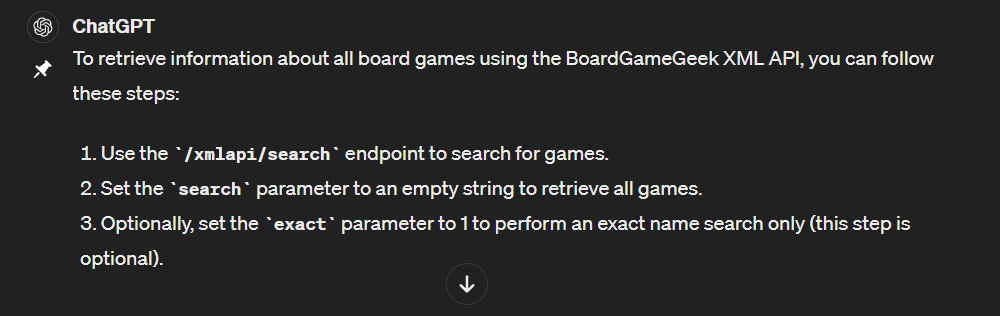

https://api.geekdo.com/xmlapi2

In [6]:
url = "https://api.geekdo.com/xmlapi2"

In [7]:
response = requests.get(url) # We use get method to make the request and get information from the API

In [8]:
type(response) # Lets look at the type of the response

requests.models.Response

In [9]:
response.status_code # We can access status code. 200 is OK

200

We can access the response content, which returns a string

In [10]:
response.content

b'<!DOCTYPE html>\n<html ng-app="GeekApp" lang="en-US" ng-cloak>\n<head>\n\t<meta charset=\'utf-8\'>\n\t<meta id="vp" name="viewport" content="width=device-width, initial-scale=1.0">\n\t\t\t<script>\n\t\t\twindow.addEventListener( \'DOMContentLoaded\',  function() {\n\t\t\t\tvar width = document.documentElement.clientWidth || window.innerWidth;\n\t\t\t\tif (width < 960) {\n\t\t\t\t\tvar mvp = document.getElementById(\'vp\');\n\t\t\t\t\t// android debugging\n\t\t\t\t\tmvp.setAttribute(\'content\',\'width=960\');\n\t\t\t\t}\n\t\t\t});\n\t\t</script>\n\t\t<meta content=\'yes\' name=\'apple-mobile-web-app-capable\'>\n\t<meta content=\'IE=edge,chrome=1\' http-equiv=\'X-UA-Compatible\'>\n\n\t\t\t<title>BoardGameGeek | Gaming Unplugged Since 2000</title>\n\t\n\t\n<link rel="apple-touch-icon" \thref="https://cf.geekdo-static.com/icons/touch-icon180.png" />\n<link rel="shortcut icon" \t\thref="https://cf.geekdo-static.com/icons/favicon2.ico" type="image/ico" />\n<link rel="icon" \t\t\t\t\thref=

# The final code

## From row 0 to 199

In [5]:
# importing the necessary things
import requests
import xml.etree.ElementTree as ET
import pandas as pd

In [3]:
# Function to fetch data for a specific board game by its ID
def fetch_board_game_data(game_id):
    base_url = "https://www.boardgamegeek.com/xmlapi/boardgame/"
    url = f"{base_url}{game_id}?stats=1&comments=1&historical=1"

    try:
        response = requests.get(url)
        response.raise_for_status()  # Raise an exception for non-200 status codes

        # Parse the XML response
        root = ET.fromstring(response.content)

        # Access the game's name
        name_element = root.find(".//name")
        name = name_element.text if name_element is not None else None

        # Access the game's mechanics
        mechanics = [mech.text for mech in root.findall(".//boardgamemechanic")]

        # Access the game's categories
        categories = [cat.text for cat in root.findall(".//boardgamecategory")]

        # Access the game's description
        description_element = root.find(".//description")
        description = description_element.text if description_element is not None else None

        # Access the game's year
        year_element = root.find(".//yearpublished")
        year = year_element.text if year_element is not None else None

        # Access the game's ratings
        ratings = None
        average_rating_element = root.find(".//average")
        if average_rating_element is not None:
          ratings = average_rating_element.text


        # Access the game's mechanics statistics
        mechanics_stats = None
        complexity_element = root.find(".//averageweight")
        if complexity_element is not None:
            mechanics_stats = complexity_element.text
        else:
            mechanics_stats = None

        # Access the game's historical data (example: number of plays)
        historical_plays_element = root.find(".//numplays")
        historical_plays = historical_plays_element.text if historical_plays_element is not None else None

        # Return a dictionary with the retrieved data
        return {
            "Game ID": game_id,
            "Game Name": name,
            "Game Mechanics": mechanics,
            "Game Categories": categories,
            "Game Description": description,
            "Game Year": year,
            "Game Ratings": ratings,
            "Game Mechanics Statistics": mechanics_stats,
            "Game Historical Data (Number of plays)": historical_plays
        }

    except requests.RequestException as e:
        print(f"Request failed for game {game_id}: {e}")
        return None

    except ET.ParseError as e:
        print(f"Failed to parse XML for game {game_id}: {e}")
        return None

    except AttributeError as e:
        print(f"Attribute error for game {game_id}: {e}")
        return None

# Create an empty list to store the data dictionaries
game_data_list = []

# Fetch data for each game in the range and append to the list
for game_id in range(1, 200):
    game_data = fetch_board_game_data(game_id)
    if game_data:
        game_data_list.append(game_data)

# Convert the list of dictionaries to a DataFrame
df = pd.DataFrame(game_data_list)

# Display the DataFrame
display(df)

KeyboardInterrupt: 

In [10]:
df_199 = df.copy()
df_199.to_csv('api_0_to_199', index=False)

In [6]:
# Locating where the file has been saved
import os
print(os.getcwd())

d:\Docs Persos\IRONHACK_BC\FINAL PROJECT\board_games_project


## From line x to y

In [7]:
# Function to fetch data for a specific board game by its ID
def fetch_board_game_data(game_id):
    base_url = "https://www.boardgamegeek.com/xmlapi/boardgame/"
    url = f"{base_url}{game_id}?stats=1&comments=1&historical=1"

    try:
        response = requests.get(url)
        response.raise_for_status()  # Raise an exception for non-200 status codes

        # Parse the XML response
        root = ET.fromstring(response.content)

        # Access the game's name
        name_element = root.find(".//name")
        name = name_element.text if name_element is not None else None

        # Access the game's mechanics
        mechanics = [mech.text for mech in root.findall(".//boardgamemechanic")]

        # Access the game's categories
        categories = [cat.text for cat in root.findall(".//boardgamecategory")]

        # Access the game's description
        description_element = root.find(".//description")
        description = description_element.text if description_element is not None else None

        # Access the game's year
        year_element = root.find(".//yearpublished")
        year = year_element.text if year_element is not None else None

        # Access the game's ratings
        ratings = None
        average_rating_element = root.find(".//average")
        if average_rating_element is not None:
          ratings = average_rating_element.text


        # Access the game's mechanics statistics
        mechanics_stats = None
        complexity_element = root.find(".//averageweight")
        if complexity_element is not None:
            mechanics_stats = complexity_element.text
        else:
            mechanics_stats = None

        # Access the game's historical data (example: number of plays)
        historical_plays_element = root.find(".//numplays")
        historical_plays = historical_plays_element.text if historical_plays_element is not None else None

        # Return a dictionary with the retrieved data
        return {
            "Game ID": game_id,
            "Game Name": name,
            "Game Mechanics": mechanics,
            "Game Categories": categories,
            "Game Description": description,
            "Game Year": year,
            "Game Ratings": ratings,
            "Game Mechanics Statistics": mechanics_stats,
            "Game Historical Data (Number of plays)": historical_plays
        }

    except requests.RequestException as e:
        print(f"Request failed for game {game_id}: {e}")
        return None

    except ET.ParseError as e:
        print(f"Failed to parse XML for game {game_id}: {e}")
        return None

    except AttributeError as e:
        print(f"Attribute error for game {game_id}: {e}")
        return None

# Create an empty list to store the data dictionaries
game_data_list = []

# Fetch data for each game in the range and append to the list
for game_id in range(15000, 20000):
    game_data = fetch_board_game_data(game_id)
    if game_data:
        game_data_list.append(game_data)

# Convert the list of dictionaries to a DataFrame
df = pd.DataFrame(game_data_list)

# Display the DataFrame
display(df)

Request failed for game 16802: HTTPSConnectionPool(host='www.boardgamegeek.com', port=443): Read timed out. (read timeout=None)


,Game ID,Game Name,Game Mechanics,Game Categories,Game Description,Game Year,Game Ratings,Game Mechanics Statistics,Game Historical Data (Number of plays)
0,15000,Waado Basuketto,[],"[Action / Dexterity, Card Game, Word Game]",The game comes with a plastic basket and a dec...,2002,None,None,None
1,15001,Okehazama 1560,[Area Movement],"[Medieval, Wargame]",&quot;Okehazama 1560&quot; consists of 100 pie...,1995,None,None,None
2,15002,Zaporozhye 1943,[Hexagon Grid],"[Wargame, World War II]",&quot;Zaporozhye 1943&quot; is a two-player Op...,1994,None,None,None
3,15003,Kids Rule!,[Acting],"[Children's Game, Educational]",It&rsquo;s the first game where kids get to be...,2004,None,None,None
4,15004,Risk 2042 (fan expansion for Risk / Axis & All...,"[Area Majority / Influence, Area Movement, Dic...","[Dice, Expansion for Base-game, Fan Expansion,...",Risk 2042 is an independent expansion for Park...,1996,None,None,None
...,...,...,...,...,...,...,...,...,...
4994,19995,Canal Mania,"[Network and Route Building, Open Drafting, Pi...","[Economic, Transportation]",Canal Mania is a game about the great canal-bu...,2006,None,None,None
4995,19996,Magician's Night,"[Push Your Luck, Slide/Push]","[Action / Dexterity, Children's Game, Fantasy]","The basic premise is simple: the board, restin...",2005,None,None,None
4996,19997,"Allons, Plume, au soleil!",[],"[Action / Dexterity, Animals, Card Game, Child...","It's summer on the North Pole, and Lars and hi...",2005,None,None,None
4997,19998,Zwerge Zocken,"[Open Drafting, Set Collection, Trick-taking]",[Card Game],A trick-taking card game with 60 cards.<br/><br/>,2005,None,None,None


In [8]:
df_15000 = df.copy()
df_15000.to_csv('api_15000_to_19999', index=False)

In [ ]:
# Locating where the file has been saved
import os
print(os.getcwd())

d:\Docs Persos\IRONHACK_BC\FINAL PROJECT\board_games_project


## Concatenating everything together to one single dataframe

In [48]:
import pandas as pd
#df1 = pd.read_csv('D:\Docs Persos\IRONHACK_BC\FINAL PROJECT\board_games_project\API files/api_1_to_200')
df1_to_200 = pd.read_excel(r'D:\Docs Persos\IRONHACK_BC\FINAL PROJECT\board_games_project\API files\api_1_to_200.xlsx')
df_500 = pd.read_excel(r'D:\Docs Persos\IRONHACK_BC\FINAL PROJECT\board_games_project\API files\api_200_to_499.xlsx')
df_2000 = pd.read_excel(r'D:\Docs Persos\IRONHACK_BC\FINAL PROJECT\board_games_project\API files\api_500_to_1999.xlsx')
df_5000 = pd.read_excel(r'D:\Docs Persos\IRONHACK_BC\FINAL PROJECT\board_games_project\API files\api_2000_to_4999.xlsx')
df_10000 = pd.read_excel(r'D:\Docs Persos\IRONHACK_BC\FINAL PROJECT\board_games_project\API files\api_5000_to_9999.xlsx')
df_12000 = pd.read_excel(r'D:\Docs Persos\IRONHACK_BC\FINAL PROJECT\board_games_project\API files\api_10000_to_11999.xlsx')
df_15000 = pd.read_excel(r'D:\Docs Persos\IRONHACK_BC\FINAL PROJECT\board_games_project\API files\api_12000_to_14999.xlsx')
df_20000 = pd.read_excel(r'D:\Docs Persos\IRONHACK_BC\FINAL PROJECT\board_games_project\API files\api_15000_to_19999.xlsx')

In [50]:
display(df1_to_200)

,Game ID,Game Name,Game Mechanics,Game Categories,Game Description,Game Year,Game Ratings,Game Mechanics Statistics,Game Historical Data (Number of plays)
0,1,Die Macher,"['Alliances', 'Area Majority / Influence', 'Au...","['Economic', 'Negotiation', 'Political']",Die Macher is a game about seven sequential po...,1986.0,NaN,NaN,NaN
1,2,Dragonmaster,['Trick-taking'],"['Card Game', 'Fantasy']",Dragonmaster is a trick-taking card game based...,1981.0,NaN,NaN,NaN
2,3,SamouraÃ¯,"['Area Majority / Influence', 'Hand Management...","['Abstract Strategy', 'Medieval']",Samurai is set in medieval Japan. Players comp...,1998.0,NaN,NaN,NaN
3,4,Tal der KÃ¶nige,"['Action Points', 'Area Majority / Influence',...",['Ancient'],When you see the triangular box and the luxuri...,1992.0,NaN,NaN,NaN
4,5,Acquire,"['Hand Management', 'Investment', 'Market', 'S...","['Economic', 'Territory Building']","In Acquire, each player strategically invests ...",1963.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
194,195,NASCAR Champions,['Dice Rolling'],"['Dice', 'Racing', 'Sports']",It looks a bit like Daytona 500 with its overs...,1998.0,NaN,NaN,NaN
195,196,Kremel,['Voting'],"['Negotiation', 'Political']",A game of political intrigue set in the Soviet...,1986.0,NaN,NaN,NaN
196,197,HellRail Ferrovie Infernali,['Pick-up and Deliver'],"['Card Game', 'Trains', 'Transportation']","Based on Dante's Inferno, HellRail: 2nd Perdit...",1999.0,NaN,NaN,NaN
197,198,Buried Treasure,['Set Collection'],"['Card Game', 'Pirates']","In Buried Treasure, players compete to compile...",1992.0,NaN,NaN,NaN


In [52]:
# concatenate the df together
# List of DataFrames
dfs = [df1_to_200, df_500, df_2000, df_5000, df_10000, df_12000, df_15000, df_2000]

# Concatenate the rows of all DataFrames
concatenated_df = pd.concat(dfs, ignore_index=True)

# Display the concatenated DataFrame
display(concatenated_df)

,Game ID,Game Name,Game Mechanics,Game Categories,Game Description,Game Year,Game Ratings,Game Mechanics Statistics,Game Historical Data (Number of plays)
0,1,Die Macher,"['Alliances', 'Area Majority / Influence', 'Au...","['Economic', 'Negotiation', 'Political']",Die Macher is a game about seven sequential po...,1986.0,NaN,NaN,NaN
1,2,Dragonmaster,['Trick-taking'],"['Card Game', 'Fantasy']",Dragonmaster is a trick-taking card game based...,1981.0,NaN,NaN,NaN
2,3,SamouraÃ¯,"['Area Majority / Influence', 'Hand Management...","['Abstract Strategy', 'Medieval']",Samurai is set in medieval Japan. Players comp...,1998.0,NaN,NaN,NaN
3,4,Tal der KÃ¶nige,"['Action Points', 'Area Majority / Influence',...",['Ancient'],When you see the triangular box and the luxuri...,1992.0,NaN,NaN,NaN
4,5,Acquire,"['Hand Management', 'Investment', 'Market', 'S...","['Economic', 'Territory Building']","In Acquire, each player strategically invests ...",1963.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
12494,1995,"Excuses, Excuses",['Roll / Spin and Move'],['Transportation'],&quot;The Excuse-Filled Game When You're Late ...,1981.0,NaN,NaN,NaN
12495,1996,Face Off,"['Auction/Bidding', 'Commodity Speculation', '...","['Negotiation', 'Sports']",A slapstick game of hockey management (endorse...,1974.0,NaN,NaN,NaN
12496,1997,Zargo's Lords: Magic Duels for World Power,"['Dice Rolling', 'Hexagon Grid']","['Fantasy', 'Wargame']",The first fantasy wargame ever published in It...,1979.0,NaN,NaN,NaN
12497,1998,Das Geheimnis der Pyramide,"['Memory', 'Push Your Luck']","[""Children's Game"", 'Memory']","Each player starts by putting, in order, one l...",1990.0,NaN,NaN,NaN


In [54]:
# Drop columns with all NaN values
concatenated_df = concatenated_df.dropna(axis=1, how='all')

display(concatenated_df)

,Game ID,Game Name,Game Mechanics,Game Categories,Game Description,Game Year
0,1,Die Macher,"['Alliances', 'Area Majority / Influence', 'Au...","['Economic', 'Negotiation', 'Political']",Die Macher is a game about seven sequential po...,1986.0
1,2,Dragonmaster,['Trick-taking'],"['Card Game', 'Fantasy']",Dragonmaster is a trick-taking card game based...,1981.0
2,3,SamouraÃ¯,"['Area Majority / Influence', 'Hand Management...","['Abstract Strategy', 'Medieval']",Samurai is set in medieval Japan. Players comp...,1998.0
3,4,Tal der KÃ¶nige,"['Action Points', 'Area Majority / Influence',...",['Ancient'],When you see the triangular box and the luxuri...,1992.0
4,5,Acquire,"['Hand Management', 'Investment', 'Market', 'S...","['Economic', 'Territory Building']","In Acquire, each player strategically invests ...",1963.0
...,...,...,...,...,...,...
12494,1995,"Excuses, Excuses",['Roll / Spin and Move'],['Transportation'],&quot;The Excuse-Filled Game When You're Late ...,1981.0
12495,1996,Face Off,"['Auction/Bidding', 'Commodity Speculation', '...","['Negotiation', 'Sports']",A slapstick game of hockey management (endorse...,1974.0
12496,1997,Zargo's Lords: Magic Duels for World Power,"['Dice Rolling', 'Hexagon Grid']","['Fantasy', 'Wargame']",The first fantasy wargame ever published in It...,1979.0
12497,1998,Das Geheimnis der Pyramide,"['Memory', 'Push Your Luck']","[""Children's Game"", 'Memory']","Each player starts by putting, in order, one l...",1990.0


In [55]:
concatenated_df = concatenated_df.drop_duplicates()

In [56]:
concatenated_df.shape

(10999, 6)

In [58]:
# Save the concatenated DataFrame to a CSV file
concatenated_df.to_csv('final_api_file.csv', index=False)